## <font color=Green>GMD Figure 6 </font>  
#### <font color=blue> *VARIANCE DECOMPOSITION* PLOT </font>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import netCDF4 as nc
from pandas.plotting import table 
import xarray as xr

#### $\color{blue}{\text{List of Modules and Data to be used}}$

In [9]:
# Load FACTS workflow data as a dataframe.
#
df_G = pd.read_fwf('../001_GMD_IP_Modules_Data/ModuleTest_DataFile_List_coupling.txt',comment = '#')
df_L = pd.read_fwf('../001_GMD_IP_Modules_Data/ModuleTest_DataFile_List_coupling.local.txt',comment = '#')
# df = pd.read_fwf('../001_GMD_IP_Modules_Data/ModuleTest_DataFile_List_ar5k14-221217.txt',comment = '#')
#df

<font color=blue> Load Module data from </font> <mark> facts-experiments </mark>

### <font color=green> Extract .nc data </font>

In [7]:
EXPDATE     = 221217
MODNO       = df.index.values;   # Number of datasets Module outputs
SCENARIO    = ['ssp585'];
# SCENARIO    = ['rcp85'];

# Workflow Components.
# wf1e = ['GrIS-emulandice', 'AIS-emulandice', 'Glaciers-emulandice', 'TE-tlm', 'LWS-ssp']
wf1e = ['AIS-emulandice', 'GrIS-emulandice', 'TE-tlm','Glaciers-emulandice',  'LWS-ssp']
#
# wf1e = ['AIS-kopp14', 'GrIS-kopp14', 'TE-kopp14','Glaciers-kopp14',  'LWS-kopp14']
# wf1e = ['AIS-deconto16', 'GrIS-kopp14', 'TE-kopp14','Glaciers-kopp14',  'LWS-kopp14']
#WORKFLO = ["wf1e"]; #["wf1e","wf1f","wf2e","wf2f"]
#
#
# Temp DF to store all .nc O/P.      
df_TEMP      = []
#
a = []
ccomp = []
#        
for scenario in SCENARIO:
    #
    for wf in wf1e: 
        #
        # Pick Component acording to workflow.
        #MODULE = df["Module"][val];  SUB_MODULE = df["sub_Module"][val]; COMP = df["Component"][val]; DATAFILE = df["DataFile"][val];
        COMP = wf.split("-")[0]; MODULE = wf.split("-")[1]; 
        val = df.index[ (df['Component'] == COMP) & (df['Module'] == MODULE) ].values[0]
        SUB_MODULE = df["sub_Module"][val];  DATAFILE   = df["DataFile"][val];
        valIND = 0
        #       
        # Skip if data is absent.
        if df["DataFile"][val] == 'XXX':
           continue 
        #
        # Pick the data files & Import nc file to dataframe. 
        dataFOLDER  = '/projects/kopp/facts-experiments/{arg2}/coupling.{arg1}/output/'.format(arg1=scenario,arg2=EXPDATE)
        dataFILE    = 'coupling.{arg1}.'.format(arg1=scenario) + df["DataFile"][val]
        # dataFOLDER  = '/projects/kopp/facts-experiments/{arg2}/ar5k14.{arg1}/output/'.format(arg1=scenario,arg2=EXPDATE)
        # dataFILE    = 'ar5k14.{arg1}.'.format(arg1=scenario) + df["DataFile"][val]
        d_nc        = xr.open_dataset(dataFOLDER + dataFILE)
        #print( "DataFILE ==> "+str(df["DataFile"][val])+"\n"+ str(d_nc.dims) + "\n" + str(d_nc.data_vars)+ "\n" + str(d_nc.coords)+"\n"+"-------------"+"\n"+"\n" )
        #
        # Index for time.
        YindST        = np.where(d_nc["years"].values == 2020)[0][0]
        YindEN        = np.where(d_nc["years"].values == 2100)[0][0]
        # Save data into a new variable.
        # sampsloccomponents =  
        ccomp.append(COMP)
        b = d_nc.sea_level_change[:,YindST:YindEN+1,0].values
        a.append(b[None,:] )
#stack all at once
sampsloccomponents = np.vstack(a)
sampsloccomponents = np.transpose(sampsloccomponents,(1,0,2))
        

In [15]:
EXPDATE     = 221217
MODNO       = df.index.values;   # Number of datasets Module outputs
SCENARIO    = ['ssp585'];
# SCENARIO    = ['rcp85'];
df = df_L
# Workflow Components.
# wf1e = ['GrIS-emulandice', 'AIS-emulandice', 'Glaciers-emulandice', 'TE-tlm', 'LWS-ssp']
wf1e = ['AIS-emulandice', 'GrIS-emulandice', 'TE-tlm','Glaciers-emulandice',  'LWS-ssp']
IP_nc(df,wf1e,SCENARIO,MODNO,EXPDATE);

## Plot: 

#### Global Def

In [16]:
colrs = 'rcbgmyrkcbgm'

/tmp/ipykernel_18684/3670162749.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


(2020.0, 2100.0)

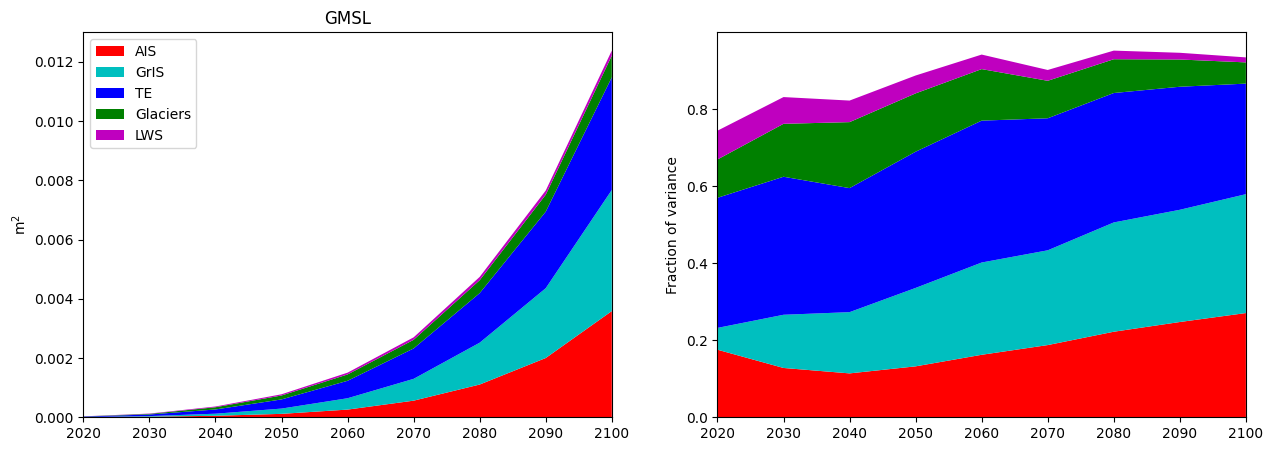

In [17]:
# Find the Var.
YAXL = []; YAXR = [];  valIND = 0
denom=np.var(np.sum(sampsloccomponents[:,:,:],axis = 1),axis=0)
for co in ccomp:
    # u = np.sum(sampsloccomponents[:,0:valIND+1,:],axis = 1)
    u = sampsloccomponents[:,valIND,:]
    vcurL=(np.var(u,axis=0))/1e6
    vcurR=(np.var(u,axis=0))/denom
    YAXL.append(vcurL)
    YAXR.append(vcurR)
    valIND += 1    
    #

plt.subplots(figsize=(15, 5))
# Basic stacked area chart.
plt.subplot(1, 2, 1)
yrs=d_nc.years[YindST:YindEN+1].values
plt.stackplot(yrs,YAXL[0],YAXL[1], YAXL[2], YAXL[3], YAXL[4], labels=ccomp, colors=colrs);
plt.legend(loc='upper left')
plt.title('GMSL'); plt.xlabel(''); plt.ylabel('m$^2$');
plt.xlim([2020, 2100])

# Fraction of variance.
plt.subplot(1, 2, 2)
yrs=d_nc.years[YindST:YindEN+1].values
plt.stackplot(yrs,YAXR[0],YAXR[1], YAXR[2], YAXR[3], YAXR[4], labels=ccomp, colors=colrs);
plt.title(''); plt.xlabel(''); plt.ylabel('Fraction of variance');
plt.xlim([2020, 2100])